# Introduction

Objective: To analyze the coverage and equitable access to community solar facilities for different demographic communities in New Jersey and to propose new solar development sites to expand access to the New Jersey Community Solar Energy Program.

https://solarhack.cloudevents.ai/

# Importing libraries

In [ ]:
#Importing libraries

import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt 
import plotly.express as ex
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
import io
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout


# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_allstates = pd.read_csv('/content/drive/MyDrive/Hackathon/deepsolar_tract.csv',encoding = "ISO-8859-1")

In [ ]:
#Narrow it down to New Jersey only

df= df_allstates.loc[df_allstates['state'] == 'nj']


# Exploratory Data Analysis

In [ ]:
#Checking data
df.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
7287,7287,49.0,38.0,1153.388772,34003017400,130417.956989,Bergen County,1304,716,82,...,27,12,13,18,0,0,9,37,1,13.69
7288,7288,62.0,28.0,3958.315174,34003017500,92363.794945,Bergen County,1510,1613,24,...,27,12,13,18,0,0,9,37,1,13.69
7289,7289,22.0,7.0,2156.017851,34003048100,100944.211903,Bergen County,869,611,80,...,27,12,13,18,0,0,9,37,1,13.69
7290,7290,24.0,11.0,2008.577718,34003027000,228957.243816,Bergen County,1406,387,44,...,27,12,13,18,0,0,9,37,1,13.69
7291,7291,62.0,14.0,4091.980916,34003028001,109512.817904,Bergen County,1382,649,60,...,27,12,13,18,0,0,9,37,1,13.69


For our analysis we need to focus in New Jersey 

## Data set

In [ ]:
#Checking dataset
df.shape

(2010, 169)

## Missing values

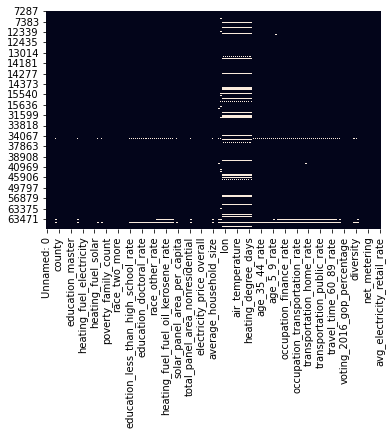

In [ ]:
# Explore missing values

sns.heatmap(df.isnull(), cbar=False)

We observe that our data have multiple columns with missing data

## Duplicate rows

In [ ]:
#Identify duplicate rows
duplicateRows = df[df.duplicated(keep='last')]

#view duplicate rows
print(duplicateRows)

Empty DataFrame
Columns: [Unnamed: 0, tile_count, solar_system_count, total_panel_area, fips, average_household_income, county, education_bachelor, education_college, education_doctoral, education_high_school_graduate, education_less_than_high_school, education_master, education_population, education_professional_school, employed, gini_index, heating_fuel_coal_coke, heating_fuel_electricity, heating_fuel_fuel_oil_kerosene, heating_fuel_gas, heating_fuel_housing_unit_count, heating_fuel_none, heating_fuel_other, heating_fuel_solar, land_area, per_capita_income, population, population_density, poverty_family_below_poverty_level, poverty_family_count, race_asian, race_black_africa, race_indian_alaska, race_islander, race_other, race_two_more, race_white, state, total_area, unemployed, water_area, education_less_than_high_school_rate, education_high_school_graduate_rate, education_college_rate, education_bachelor_rate, education_master_rate, education_professional_school_rate, education_do

We have not find any duplicate

In [ ]:
# Dropping unnmaed column and state

df = df.drop(['Unnamed: 0', 'state'], axis=1)

In [ ]:
# Descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tile_count,2010.0,6.565174e+01,1.059497e+02,0.000000e+00,9.000000e+00,2.950000e+01,7.800000e+01,1.114000e+03
solar_system_count,2010.0,2.971891e+01,3.912555e+01,0.000000e+00,5.000000e+00,1.600000e+01,4.000000e+01,5.900000e+02
total_panel_area,2010.0,4.506840e+03,1.214197e+04,0.000000e+00,2.614846e+02,1.009578e+03,3.387193e+03,1.664876e+05
fips,2010.0,3.401929e+10,1.127824e+07,3.400100e+10,3.400902e+10,3.401901e+10,3.402705e+10,3.404103e+10
average_household_income,1993.0,9.640193e+04,4.714327e+04,2.083709e+04,6.464728e+04,8.648441e+04,1.155644e+05,3.884175e+05
...,...,...,...,...,...,...,...,...
cooperate_tax,2010.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
property_tax,2010.0,9.000000e+00,0.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
sales_tax,2010.0,3.700000e+01,0.000000e+00,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
rebate,2010.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Dropping Numerical Variables with Zero variance

In [ ]:
# Checks if there is any variables with zero variance
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


tile_count                     1.059497e+02
solar_system_count             3.912555e+01
total_panel_area               1.214197e+04
fips                           1.127824e+07
average_household_income       4.714327e+04
                                   ...     
cooperate_tax                  0.000000e+00
property_tax                   0.000000e+00
sales_tax                      0.000000e+00
rebate                         0.000000e+00
avg_electricity_retail_rate    1.776799e-15
Length: 165, dtype: float64

In [ ]:
# Drops variables with 0 variance
df = df.drop(df.std()[df.std() == 0].index, axis = 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Checking dataset
df.shape

(2010, 152)

## Dropping Categorical Variables with Zero variance

In [ ]:
# Identifying categorical variable
categorical_var = list(set(df.dtypes[df.dtypes == object].index))

In [ ]:
categorical_var

['county', 'electricity_price_transportation']

In [ ]:
# Access the first 5 rows of the electricity 

df['electricity_price_transportation'][:5] 

7287    10.25
7288    10.25
7289    10.25
7290    10.25
7291    10.25
Name: electricity_price_transportation, dtype: object

This is not a categorical variable so we proceed to convert it into float

In [ ]:
#Converting electricity price into float
df["electricity_price_transportation"] = pd.to_numeric(df["electricity_price_transportation"], errors='coerce')

In [ ]:
# Identifying categorical variable
categorical_var = list(set(df.dtypes[df.dtypes == object].index))
categorical_var

['county']

In [ ]:
# Creates an empty list for categorical variables with zero variation
zero_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) == 1: # check how many levels it has and if it is one
        zero_cardinality.append(i) # the variable has zero variance as the cardinality is one 
        # append it to the list of categorical variables with zero variation
        
df = df.drop(zero_cardinality, axis = 1) # drops variables with 0 variance

In [ ]:
#Checking dataset
df.shape

(2010, 152)

## Dropping Categorical Variables with Many Levels

In [ ]:
# Creates a list of categorical variables with high cardinality
high_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) > 200: # check how many levels it has and if it is more
        high_cardinality.append(i) # than 200, variable has many levels
        # so append it to the list of categorical variables with high cardinality
        
print(high_cardinality) # Prints the list of variables with high cardinality

[]


None of them have many level

## Handling missing values


In [ ]:
numerical_var = list(df.select_dtypes(exclude = 'object').columns)
numerical_var

['tile_count',
 'solar_system_count',
 'total_panel_area',
 'fips',
 'average_household_income',
 'education_bachelor',
 'education_college',
 'education_doctoral',
 'education_high_school_graduate',
 'education_less_than_high_school',
 'education_master',
 'education_population',
 'education_professional_school',
 'employed',
 'gini_index',
 'heating_fuel_coal_coke',
 'heating_fuel_electricity',
 'heating_fuel_fuel_oil_kerosene',
 'heating_fuel_gas',
 'heating_fuel_housing_unit_count',
 'heating_fuel_none',
 'heating_fuel_other',
 'heating_fuel_solar',
 'land_area',
 'per_capita_income',
 'population',
 'population_density',
 'poverty_family_below_poverty_level',
 'poverty_family_count',
 'race_asian',
 'race_black_africa',
 'race_indian_alaska',
 'race_islander',
 'race_other',
 'race_two_more',
 'race_white',
 'total_area',
 'unemployed',
 'water_area',
 'education_less_than_high_school_rate',
 'education_high_school_graduate_rate',
 'education_college_rate',
 'education_bachelor_ra

In [ ]:
categorical_var = list(df.select_dtypes(include = 'object').columns)

# Fills in the missing values in numerical columns with median
# and overwrites the result into the esxisting dataset
df[numerical_var] = df[numerical_var].fillna(df[numerical_var].median(), 
                                             inplace = False)

# Fills in the missing values in numerical columns with mode
# and overwrites the result into the esxisting dataset
df[categorical_var] = df[categorical_var].fillna(df[categorical_var].mode(), 
                                                 inplace = False)

In [ ]:
#Checking dataset
df.shape

(2010, 152)

In [ ]:
df.dropna(inplace=True)   #dropping missing values for analysis purposes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 7287 to 66970
Columns: 152 entries, tile_count to avg_electricity_retail_rate
dtypes: bool(2), float64(117), int64(32), object(1)
memory usage: 2.3+ MB


In [ ]:
#Checking dataset
df.shape

(2010, 152)

In [ ]:
#Get rid of infinite values 
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Checking dataset
df.shape

(2010, 152)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
#Checking dataset
df.shape

(2010, 152)

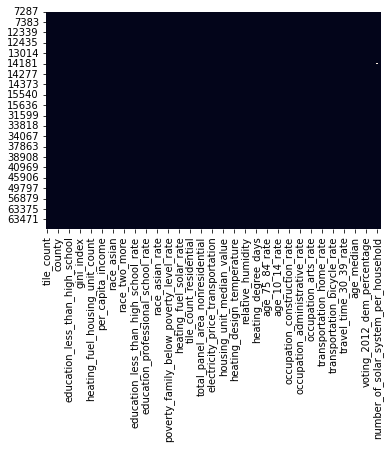

In [ ]:
# Explore missing values

sns.heatmap(df.isnull(), cbar=False)

## Exploring data visualization

count             2010
unique              21
top       Essex County
freq               210
Name: county, dtype: object




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


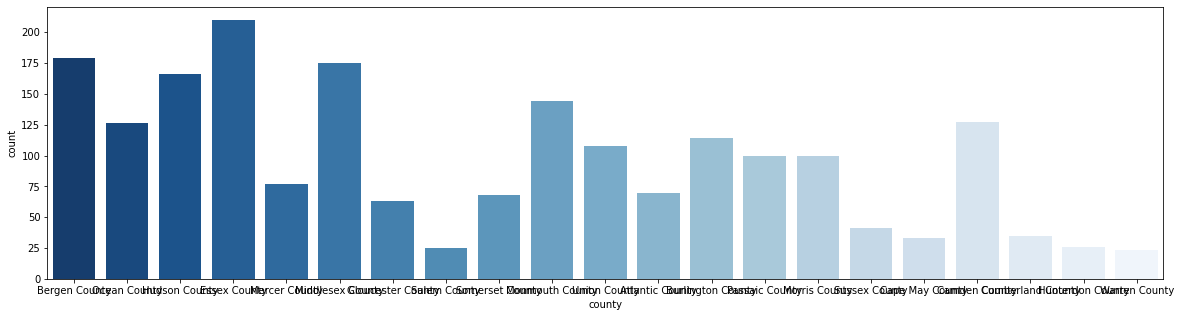

In [ ]:
print(df['county'].describe()) # describing county variable
print('\n') # new line command

plt.figure(figsize = (20,5))
sns.countplot(df['county'],palette='Blues_r')

Seems like out top county is Exssex regarding count vairbales

In [ ]:
#Reviewing country by total panel area 

df.groupby('county')['total_panel_area'].mean().sort_values(
    ascending = False)

county
Mercer County        8998.226954
Somerset County      8982.127985
Hunterdon County     8441.876097
Warren County        7997.875905
Middlesex County     7652.304969
Burlington County    6923.665163
Gloucester County    6834.544146
Monmouth County      6119.765322
Cumberland County    5528.564503
Atlantic County      5319.353848
Ocean County         5297.829153
Morris County        3753.939784
Union County         3481.954541
Cape May County      3359.158461
Sussex County        3140.713655
Camden County        2618.679397
Bergen County        2499.777137
Passaic County       2353.704134
Hudson County        2062.666423
Salem County         1964.310368
Essex County         1333.457465
Name: total_panel_area, dtype: float64

Seems like Mercer County has the biggest mean regarding total area of solar panels by m^2

In [ ]:
#Reviewing country by total panel area median

df.groupby('county')['total_panel_area'].median().sort_values(
    ascending = False)

county
Ocean County         2992.632938
Somerset County      2734.889755
Gloucester County    2425.037106
Monmouth County      2036.856532
Burlington County    1999.418236
Middlesex County     1586.769374
Atlantic County      1578.087068
Cape May County      1498.053208
Warren County        1321.760033
Mercer County        1063.132096
Morris County        1025.264438
Union County          922.062171
Camden County         906.113915
Cumberland County     730.549472
Bergen County         618.644547
Hunterdon County      555.793335
Salem County          452.752762
Passaic County        412.029072
Essex County          234.064785
Sussex County         208.289737
Hudson County         144.347229
Name: total_panel_area, dtype: float64

Seems like Ocean County has the biggest median regarding total area of solar panels by m^2

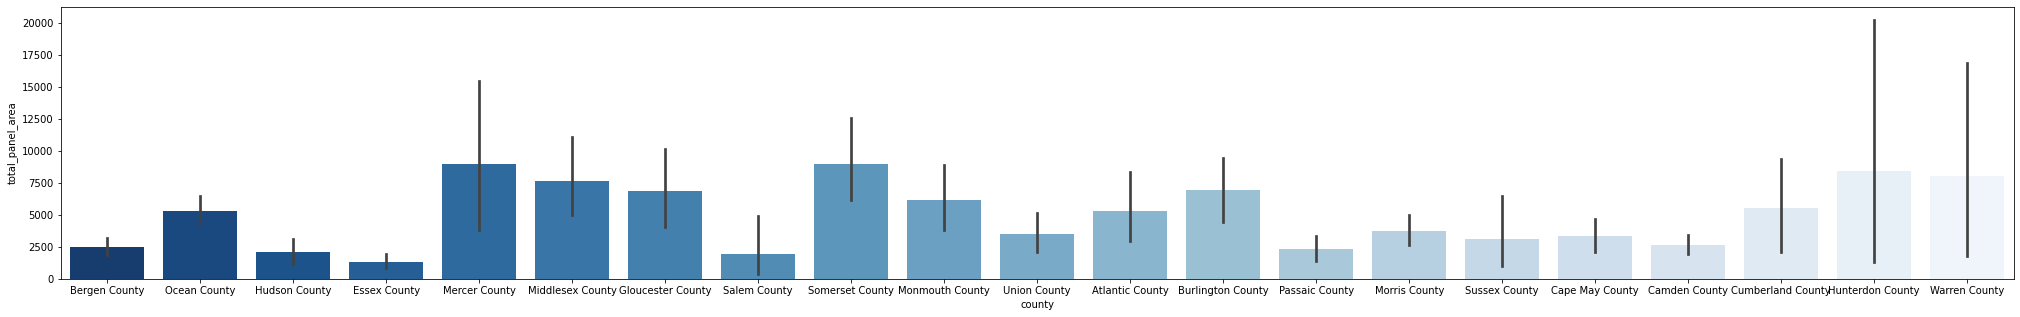

In [ ]:
#County vs total panel area 

plt.figure(figsize=(35,5))
sns.barplot(x= df['county'],y=df['total_panel_area'],palette='Blues_r')

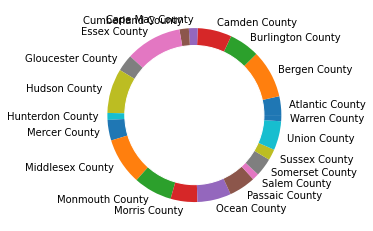

In [ ]:
category_values = df.pivot_table(columns=['county'], aggfunc='size')

category_names = df['county']
categories = category_names.unique()
categories.sort()
plt.pie(category_values, labels=categories)

my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
state_df[state_df['NAME'] == 'New Jersey'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties and pass 'total_panel_area' as the data to color
gdf.plot(
    ax=gax, edgecolor='black', column='solar_panel_area_per_capita', legend=True, cmap='RdBu_r',
    vmin=0.2, vmax=0.8
)

# Add text to let people know what we are plotting
gax.annotate('Total Panel Area',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')
plt.show()

In [ ]:
df['total_panel_area'].mean()

4506.840101569277

In [ ]:
df['total_panel_area'].median()

1009.577993545

In [ ]:
df['average_household_income'].mean()

96318.051757219

In [ ]:
df['median_household_income'].median()

71786.0

# Definding our target variable

We want to predict the areas that have do not possees any solar panes by m^2 .



In [ ]:
#Definding our target variable 

def f(total_panel_area):

    if total_panel_area <= 0 :
        return 1
    elif total_panel_area > 0:
        return 0
    else: 
      return 0

df['total_panel_area'] = df['total_panel_area'].apply(f)

In [ ]:
df['total_panel_area'].value_counts()

0    1886
1     124
Name: total_panel_area, dtype: int64

In [ ]:
df.head()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,...,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,avg_electricity_retail_rate
7287,49.0,38.0,0,34003017400,130417.956989,Bergen County,1304,716,82,770,...,0.544974,0.425091,True,0.55,0.441,True,15.063393,0.318528,0.019355,13.69
7288,62.0,28.0,0,34003017500,92363.794945,Bergen County,1510,1613,24,1145,...,0.544974,0.425091,True,0.55,0.441,True,14.048025,0.409910,0.008900,13.69
7289,22.0,7.0,0,34003048100,100944.211903,Bergen County,869,611,80,651,...,0.544974,0.425091,True,0.55,0.441,True,14.417339,0.540770,0.003924,13.69
7290,24.0,11.0,0,34003027000,228957.243816,Bergen County,1406,387,44,177,...,0.544974,0.425091,True,0.55,0.441,True,15.973551,0.165055,0.005654,13.69
7291,62.0,14.0,0,34003028001,109512.817904,Bergen County,1382,649,60,675,...,0.544974,0.425091,True,0.55,0.441,True,14.777228,0.573433,0.003561,13.69


In [ ]:
# Access the first 5 rows of the electricity 

df['total_panel_area'][:5] 

7287    0
7288    0
7289    0
7290    0
7291    0
Name: total_panel_area, dtype: int64

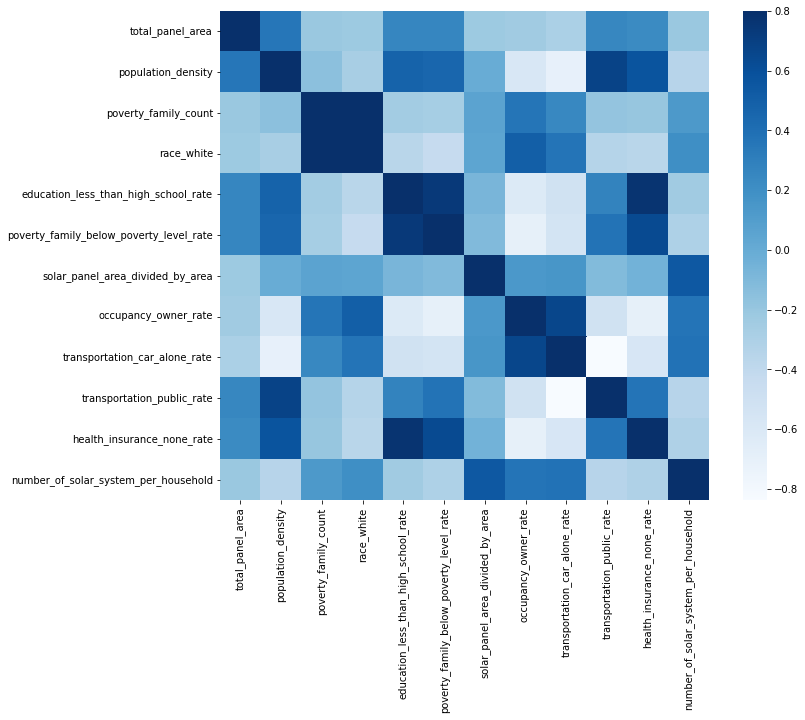

In [ ]:
#correlation matrix

# computes the person correlation among variables
corrmat = df.corr() 

# returns highly correlated variables
high_c = corrmat[corrmat['total_panel_area'].abs()>0.2].index

# plots a correlation plot
f, ax = plt.subplots(figsize=(12, 9)) # determines the figure size
ax = sns.heatmap(corrmat.loc[high_c, high_c], vmax=.8, square=True, cmap="Blues") # creates a heatmap using the correlation matrix

In [ ]:
#Checking correlation

corr_matrix = df.corr()
print(corr_matrix["total_panel_area"].sort_values(ascending=False))

total_panel_area                           1.000000
population_density                         0.355337
poverty_family_below_poverty_level_rate    0.259612
education_less_than_high_school_rate       0.257013
transportation_public_rate                 0.253789
                                             ...   
electricity_price_residential                   NaN
electricity_price_commercial                    NaN
electricity_price_industrial                    NaN
electricity_price_transportation                NaN
avg_electricity_retail_rate                     NaN
Name: total_panel_area, Length: 151, dtype: float64


We observe positive high correlation with pupulation_density, poverty_family education_less than high school, transportation 

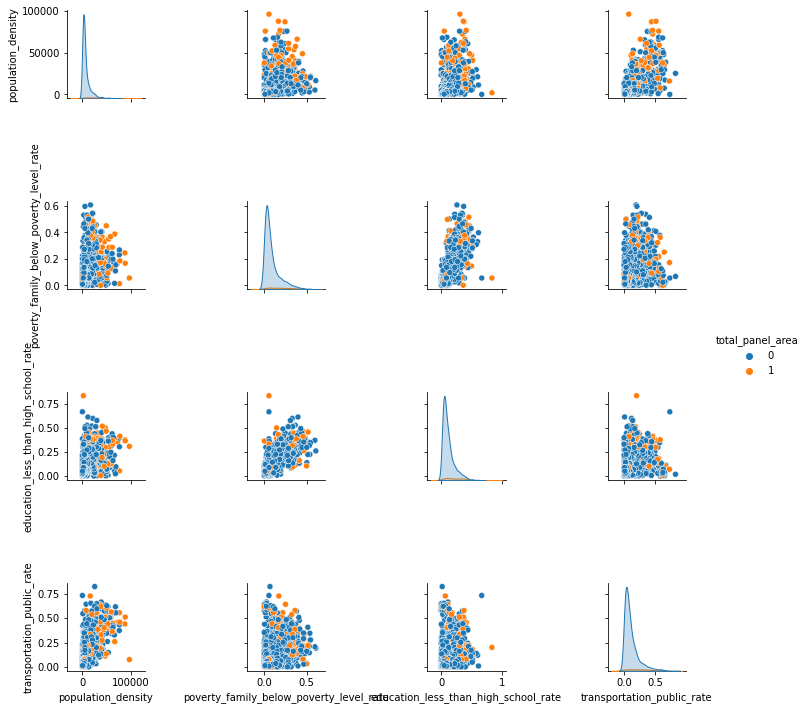

In [ ]:
#Plotting the results

sns.pairplot(df[['population_density','poverty_family_below_poverty_level_rate','education_less_than_high_school_rate','transportation_public_rate','total_panel_area' ]],hue='total_panel_area')


*   Areas with less population density tend to not have solar panels, as well with high poverty level population 
*   Areas wehere education is less than high school rate is high tend to not have solar panels and also transportation public rate










# Logistic Regression

In [ ]:
# Creating a new data frame for the regression
df_Regression=df.copy()
df_Regression = df_Regression[['county', 'total_panel_area','population_density','poverty_family_below_poverty_level_rate','education_less_than_high_school_rate','transportation_public_rate']]
df_Regression.head()

,county,total_panel_area,population_density,poverty_family_below_poverty_level_rate,education_less_than_high_school_rate,transportation_public_rate
7287,Bergen County,0,5946.591,0.027907,0.053871,0.197752
7288,Bergen County,0,7280.464,0.054640,0.121083,0.085983
7289,Bergen County,0,6579.957,0.019038,0.104839,0.202637
7290,Bergen County,0,2381.458,0.000000,0.031522,0.210198
7291,Bergen County,0,5766.219,0.127785,0.090933,0.237113


In [ ]:
# extracts the categorical values
categorical_var = list(set(df_Regression.dtypes[df_Regression.dtypes == object].index) - set(['total_panel_area']))
categorical_var

['county']

In [ ]:
# Create dummy variables 
dummy_cat_df = pd.get_dummies(df_Regression[categorical_var], drop_first=True) 

# Drops categorical variables from the df
df_Regression = df_Regression.drop(categorical_var, axis = 1) 

# Adds the newly created dummy variables instead
df_Regression = pd.concat([df_Regression, dummy_cat_df], axis = 1) 

In [ ]:
df_Regression.head()

,total_panel_area,population_density,poverty_family_below_poverty_level_rate,education_less_than_high_school_rate,transportation_public_rate,county_Bergen County,county_Burlington County,county_Camden County,county_Cape May County,county_Cumberland County,...,county_Middlesex County,county_Monmouth County,county_Morris County,county_Ocean County,county_Passaic County,county_Salem County,county_Somerset County,county_Sussex County,county_Union County,county_Warren County
7287,0,5946.591,0.027907,0.053871,0.197752,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7288,0,7280.464,0.054640,0.121083,0.085983,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7289,0,6579.957,0.019038,0.104839,0.202637,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7290,0,2381.458,0.000000,0.031522,0.210198,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,0,5766.219,0.127785,0.090933,0.237113,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_Regression.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
#Re-classifying attrition flag as category
df_Regression['total_panel_area'] =  df_Regression['total_panel_area'].astype("category",copy=False)

In [ ]:
#Separating our target
X = df_Regression.drop('total_panel_area', axis=1)
y = df_Regression['total_panel_area']

In [ ]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_rescaled = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
X_rescaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population_density,1407.0,0.087380,0.124723,0.0,0.018225,0.040872,0.099262,1.0
poverty_family_below_poverty_level_rate,1407.0,0.152477,0.165763,0.0,0.039852,0.090509,0.203311,1.0
education_less_than_high_school_rate,1407.0,0.181297,0.152121,0.0,0.074707,0.133733,0.234680,1.0
transportation_public_rate,1407.0,0.141043,0.155447,0.0,0.036973,0.087689,0.187140,1.0
county_Bergen County,1407.0,0.089552,0.285641,0.0,0.000000,0.000000,0.000000,1.0
county_Burlington County,1407.0,0.061834,0.240939,0.0,0.000000,0.000000,0.000000,1.0
county_Camden County,1407.0,0.062544,0.242228,0.0,0.000000,0.000000,0.000000,1.0
county_Cape May County,1407.0,0.015636,0.124107,0.0,0.000000,0.000000,0.000000,1.0
county_Cumberland County,1407.0,0.018479,0.134724,0.0,0.000000,0.000000,0.000000,1.0
county_Essex County,1407.0,0.103767,0.305066,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Build a logistic model
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

# Check predictions
y_pred = logmodel.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

 #Check coefficients
print(logmodel.coef_)

[[556   6]
 [ 36   5]]
[[ 2.89576811  1.84982436  0.92752432  1.41608495 -0.36599495 -0.23420212
  -0.01132744 -0.49020324  0.83595294  0.00764509 -0.707694    0.009957
  -0.32721657 -0.51460754 -1.44929747 -0.82636352 -0.02091156 -0.2867472
  -0.65786719  0.56355353 -0.74810911  0.97827456 -0.64925303  1.0992825 ]]


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

         Current function value: 0.182732
         Iterations: 35
                                                                           Results: Logit
Model:                                               Logit                                             Pseudo R-squared:                                  0.185     
Dependent Variable:                                  total_panel_area                                  AIC:                                               562.2085  
Date:                                                2022-10-23 21:43                                  BIC:                                               688.1897  
No. Observations:                                    1407                                              Log-Likelihood:                                    -257.10   
Df Model:                                            23                                                LL-Null:                                           -315.42   
Df Residuals:      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
X.columns

Index(['population_density', 'poverty_family_below_poverty_level_rate',
       'education_less_than_high_school_rate', 'transportation_public_rate',
       'county_Bergen County', 'county_Burlington County',
       'county_Camden County', 'county_Cape May County',
       'county_Cumberland County', 'county_Essex County',
       'county_Gloucester County', 'county_Hudson County',
       'county_Hunterdon County', 'county_Mercer County',
       'county_Middlesex County', 'county_Monmouth County',
       'county_Morris County', 'county_Ocean County', 'county_Passaic County',
       'county_Salem County', 'county_Somerset County', 'county_Sussex County',
       'county_Union County', 'county_Warren County'],
      dtype='object')

The following feautures do not have significant importance in the model:
'Transportation_public_rate'
'county_Cape May County'
'county_Gloucester County'
'county_Middlesex County'
'county_Somerset County'

 We proceed to drop them


In [ ]:
#Dropping non-significant variables
df_clean = df_Regression.drop([ 'transportation_public_rate', 'county_Cape May County', 'county_Gloucester County', 'county_Middlesex County', 'county_Somerset County'] , axis=1)

In [ ]:
#Separating our target
X = df_clean.drop('total_panel_area', axis=1)
y = df_clean['total_panel_area']

In [ ]:
# Train and test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_rescaled = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
X_rescaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population_density,1407.0,0.087380,0.124723,0.0,0.018225,0.040872,0.099262,1.0
poverty_family_below_poverty_level_rate,1407.0,0.152477,0.165763,0.0,0.039852,0.090509,0.203311,1.0
education_less_than_high_school_rate,1407.0,0.181297,0.152121,0.0,0.074707,0.133733,0.234680,1.0
county_Bergen County,1407.0,0.089552,0.285641,0.0,0.000000,0.000000,0.000000,1.0
county_Burlington County,1407.0,0.061834,0.240939,0.0,0.000000,0.000000,0.000000,1.0
county_Camden County,1407.0,0.062544,0.242228,0.0,0.000000,0.000000,0.000000,1.0
county_Cumberland County,1407.0,0.018479,0.134724,0.0,0.000000,0.000000,0.000000,1.0
county_Essex County,1407.0,0.103767,0.305066,0.0,0.000000,0.000000,0.000000,1.0
county_Hudson County,1407.0,0.084577,0.278350,0.0,0.000000,0.000000,0.000000,1.0
county_Hunterdon County,1407.0,0.011372,0.106068,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Build a logistic model
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

# Check predictions
pred_Y_lr = logmodel.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, pred_Y_lr ))

#Check coefficients
print(logmodel.coef_)

[[555   7]
 [ 36   5]]
[[ 3.1551084   2.12091156  0.86658348 -0.06029957 -0.08942955  0.20164111
   0.93594253  0.47013031  0.70477893 -0.28007382 -0.36507777 -0.65325131
   0.14091845 -0.174665   -0.43738209  0.65012465  1.09254456 -0.46176246
   1.19813155]]


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

         Current function value: 0.281962
         Iterations: 35
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.258  
Dependent Variable: total_panel_area AIC:              831.4402
Date:               2022-10-23 21:43 BIC:              931.1753
No. Observations:   1407             Log-Likelihood:   -396.72 
Df Model:           18               LL-Null:          -315.42 
Df Residuals:       1388             LLR p-value:      1.0000  
Converged:          0.0000           Scale:            1.0000  
No. Iterations:     35.0000                                    
---------------------------------------------------------------
        Coef.    Std.Err.    z    P>|z|     [0.025     0.975]  
---------------------------------------------------------------
x1       7.5498    1.1352  6.6504 0.0000      5.3248     9.7749
x2       3.3639    0.8332  4.0372 0.0001      1.7308     4.9970
x3      -8.9646    1.0673 -8.3994 0.0000    -11.0564    -6.8727

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
X.columns

Index(['population_density', 'poverty_family_below_poverty_level_rate',
       'education_less_than_high_school_rate', 'county_Bergen County',
       'county_Burlington County', 'county_Camden County',
       'county_Cumberland County', 'county_Essex County',
       'county_Hudson County', 'county_Hunterdon County',
       'county_Mercer County', 'county_Monmouth County',
       'county_Morris County', 'county_Ocean County', 'county_Passaic County',
       'county_Salem County', 'county_Sussex County', 'county_Union County',
       'county_Warren County'],
      dtype='object')

In [ ]:
print(classification_report(y_test,pred_Y_lr ))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       562
           1       0.42      0.12      0.19        41

    accuracy                           0.93       603
   macro avg       0.68      0.55      0.58       603
weighted avg       0.90      0.93      0.91       603



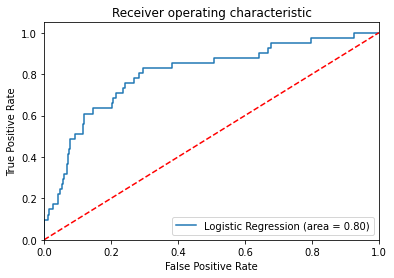

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN Model

In [ ]:
X_rescaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population_density,1407.0,0.087380,0.124723,0.0,0.018225,0.040872,0.099262,1.0
poverty_family_below_poverty_level_rate,1407.0,0.152477,0.165763,0.0,0.039852,0.090509,0.203311,1.0
education_less_than_high_school_rate,1407.0,0.181297,0.152121,0.0,0.074707,0.133733,0.234680,1.0
county_Bergen County,1407.0,0.089552,0.285641,0.0,0.000000,0.000000,0.000000,1.0
county_Burlington County,1407.0,0.061834,0.240939,0.0,0.000000,0.000000,0.000000,1.0
county_Camden County,1407.0,0.062544,0.242228,0.0,0.000000,0.000000,0.000000,1.0
county_Cumberland County,1407.0,0.018479,0.134724,0.0,0.000000,0.000000,0.000000,1.0
county_Essex County,1407.0,0.103767,0.305066,0.0,0.000000,0.000000,0.000000,1.0
county_Hudson County,1407.0,0.084577,0.278350,0.0,0.000000,0.000000,0.000000,1.0
county_Hunterdon County,1407.0,0.011372,0.106068,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

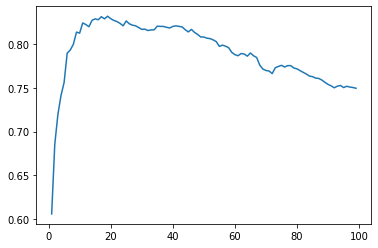

In [ ]:
# Determining optimal value of k

sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
# Determining optimal value 
print('Optimal k: ' , cv_scores.index(max(cv_scores))+1)

Optimal k:  19


In [ ]:
# Redo with k = 19

knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(X_train, y_train)

pred_Y_knn = knn.predict(X_test)

print(confusion_matrix(y_test,pred_Y_knn))
print(classification_report(y_test,pred_Y_knn))

[[562   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       562
           1       0.00      0.00      0.00        41

    accuracy                           0.93       603
   macro avg       0.47      0.50      0.48       603
weighted avg       0.87      0.93      0.90       603



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


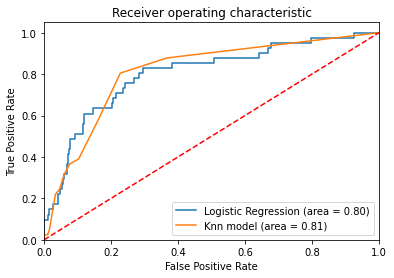

In [ ]:
#Logistic 

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# Knn Forest 

knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='Knn model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Knn_ROC')
plt.show()


# Random Forest

In [ ]:
#Separating our target
X = df_clean.drop('total_panel_area', axis=1)
y = df_clean['total_panel_area']

In [ ]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Random Forest
rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[562,   0],
       [ 41,   0]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       562
           1       0.00      0.00      0.00        41

    accuracy                           0.93       603
   macro avg       0.47      0.50      0.48       603
weighted avg       0.87      0.93      0.90       603



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accruaacy is 78%

# Boosted Tree

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[544,  18],
       [ 29,  12]])

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       562
           1       0.40      0.29      0.34        41

    accuracy                           0.92       603
   macro avg       0.67      0.63      0.65       603
weighted avg       0.91      0.92      0.92       603



The accruacy is of 79%

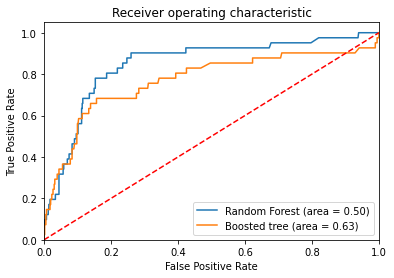

In [ ]:
# Random Forest 
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict(X_test))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

For the analysis purpose one should only standarize the variables for logistic and KNN model but not for the random forest or the boosted tree.

# Naive Bayes

In [ ]:
#Building Bayes Model

attrited_nb = MultinomialNB(alpha=0.01)
attrited_nb.fit(X_train, y_train) 

y_pred = attrited_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[542  20]
 [ 36   5]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       562
           1       0.20      0.12      0.15        41

    accuracy                           0.91       603
   macro avg       0.57      0.54      0.55       603
weighted avg       0.89      0.91      0.90       603



Bayes Model has a accruacy of 65% 

In [ ]:
attrited_nb.n_features_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


19

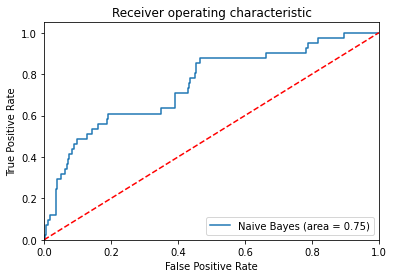

In [ ]:
nb_roc_auc = roc_auc_score(y_test, attrited_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, attrited_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The model does have some predicting power as the area under the curve is above .5

*** Package for debugging Machine Learning ***


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(attrited_nb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0 ± 0.0000,county_Warren County
0 ± 0.0000,county_Cumberland County
0 ± 0.0000,county_Sussex County
0 ± 0.0000,county_Salem County
0 ± 0.0000,poverty_family_below_poverty_level_rate
-0.0003 ± 0.0013,education_less_than_high_school_rate
-0.0010 ± 0.0045,county_Ocean County
-0.0010 ± 0.0016,county_Morris County
-0.0010 ± 0.0027,county_Burlington County
-0.0010 ± 0.0034,county_Union County


# Artifitial Neural Networks 

In [ ]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# MinMax Scaler transforms features into [0,1]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_rescaled = pd.DataFrame(X_train, columns=X.columns)

X_rescaled.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
population_density,1407.0,0.087380,0.124723,0.0,0.018225,0.040872,0.099262,1.0
poverty_family_below_poverty_level_rate,1407.0,0.152477,0.165763,0.0,0.039852,0.090509,0.203311,1.0
education_less_than_high_school_rate,1407.0,0.181297,0.152121,0.0,0.074707,0.133733,0.234680,1.0
county_Bergen County,1407.0,0.089552,0.285641,0.0,0.000000,0.000000,0.000000,1.0
county_Burlington County,1407.0,0.061834,0.240939,0.0,0.000000,0.000000,0.000000,1.0
county_Camden County,1407.0,0.062544,0.242228,0.0,0.000000,0.000000,0.000000,1.0
county_Cumberland County,1407.0,0.018479,0.134724,0.0,0.000000,0.000000,0.000000,1.0
county_Essex County,1407.0,0.103767,0.305066,0.0,0.000000,0.000000,0.000000,1.0
county_Hudson County,1407.0,0.084577,0.278350,0.0,0.000000,0.000000,0.000000,1.0
county_Hunterdon County,1407.0,0.011372,0.106068,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Building the model 

MLPC_model = MLPClassifier(hidden_layer_sizes=80, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)
 
print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[562   0]
 [ 40   1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       562
           1       1.00      0.02      0.05        41

    accuracy                           0.93       603
   macro avg       0.97      0.51      0.51       603
weighted avg       0.94      0.93      0.90       603



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.7985851922576165


In [ ]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 10
max_hidden_layer_size = 100
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

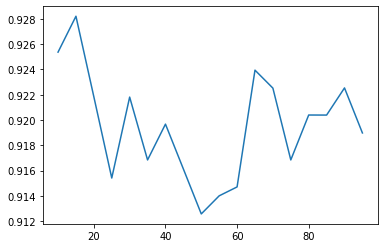

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

From the chart we can observe that 40 is the best and optimize number of hiddden layers. We proceed to test it. 

In [ ]:
optimal_mlp = MLPClassifier(hidden_layer_sizes=40,activation = 'logistic',solver = 'adam')

optimal_mlp.fit(X_train, y_train)

pred_ = optimal_mlp.predict(X_test)

print(confusion_matrix(y_test,pred_))
print(classification_report(y_test,pred_))

[[562   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       562
           1       0.00      0.00      0.00        41

    accuracy                           0.93       603
   macro avg       0.47      0.50      0.48       603
weighted avg       0.87      0.93      0.90       603



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

NotFittedError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


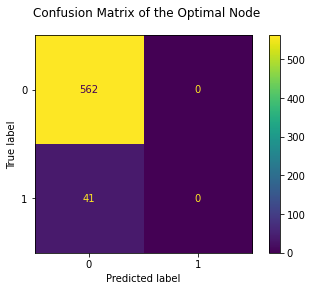

In [ ]:
fig = plot_confusion_matrix(optimal_mlp, X_test, y_test, display_labels=optimal_mlp.classes_)
fig.figure_.suptitle("Confusion Matrix of the Optimal Node")
plt.show()

# Deep Learning

In [ ]:
# Using the same rescaled data

X_rescaled.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
population_density,1407.0,0.087380,0.124723,0.0,0.018225,0.040872,0.099262,1.0
poverty_family_below_poverty_level_rate,1407.0,0.152477,0.165763,0.0,0.039852,0.090509,0.203311,1.0
education_less_than_high_school_rate,1407.0,0.181297,0.152121,0.0,0.074707,0.133733,0.234680,1.0
county_Bergen County,1407.0,0.089552,0.285641,0.0,0.000000,0.000000,0.000000,1.0
county_Burlington County,1407.0,0.061834,0.240939,0.0,0.000000,0.000000,0.000000,1.0
county_Camden County,1407.0,0.062544,0.242228,0.0,0.000000,0.000000,0.000000,1.0
county_Cumberland County,1407.0,0.018479,0.134724,0.0,0.000000,0.000000,0.000000,1.0
county_Essex County,1407.0,0.103767,0.305066,0.0,0.000000,0.000000,0.000000,1.0
county_Hudson County,1407.0,0.084577,0.278350,0.0,0.000000,0.000000,0.000000,1.0
county_Hunterdon County,1407.0,0.011372,0.106068,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Building the model 

model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          batch_size=30,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
47/47 [==============================] - 1s 9ms/step - loss: 0.4940 - val_loss: 0.2959
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.2748 - val_loss: 0.2499
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2703 - val_loss: 0.2344
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2439 - val_loss: 0.2281
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2227 - val_loss: 0.2255
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2188 - val_loss: 0.2206
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2132 - val_loss: 0.2190
Epoch 8/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2103 - val_loss: 0.2161
Epoch 9/100
47/47 [==============================] - 0s 5ms/step - loss: 0.2018 - val_loss: 0.2174
Epoch 10/100
47/47 [==============================] - 0s 5ms/step - loss: 0.2120 - val_loss: 0.2165
Epoch 11/

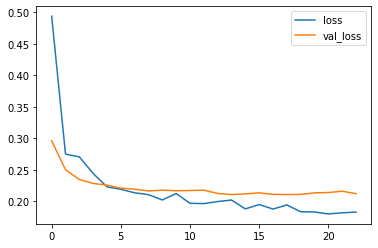

In [ ]:
#Visualiztion loss vs val_loss 

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

19/19 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       562
           1       0.00      0.00      0.00        41

    accuracy                           0.93       603
   macro avg       0.47      0.50      0.48       603
weighted avg       0.87      0.93      0.90       603



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

[[562   0]
 [ 41   0]]
19/19 [==============================] - 0s 2ms/step
ROC AUC:  0.8118652894714
